In [3]:
### Song Annotator - A tool for annotating songs with lighting sequences

import os
import imageio as iio
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import subprocess

# import cv2

In [4]:
### TO DO 
# - Create unittests - TODO - started
# - Convert FPS (frames per beat) to time sequence using BPM - TODO: TEST
# - Automatic alignment of spectrogram and light show sequence
# - Add a way to save the annotations
# - Add a way to load the annotations
# - Render the annotations to a music video - TODO: FINISH
# - Add custom show sequences


In [1]:
#load json of shows
def json_to_pandas(json_path, jsontype="shows"):
    with open(json_path, "r") as f:
        dict = json.load(f)

    df = pd.DataFrame(dict[jsontype])
    return df

def pandas_to_json(df, json_path, jsontype="shows"):
    
    dict = {jsontype: df.to_dict(orient="records")}

    with open(json_path, "w") as f:
        json.dump(dict, f)


#add shows to new dictionary as images

def image_to_dict(df, folder="RAW"):
    image_dict = {}
    for i in range(len(df)-1):
        df_row = df.iloc[i]
        image_path = os.path.join(folder, df_row["path"] )
        image_dict[df_row["showName"]] = iio.imread(image_path)
    return image_dict


def save_images_from_dict(show_image_dict, folder="custom"):
    for show_name, image in show_image_dict.items():
        image_path = os.path.join(folder, show_name + ".png")
        iio.imwrite(image_path, image)

### Convert time
def convert_show_framerate(show_image, dict=None, new_frameRate=64):
    #converts images as nparray to new frame rate by scaling the axes
    try:
        show_image = dict[show_image]
        old_frameRate = show_image.shape[1]

    except:
        old_frameRate = show_image.shape[1]

    scale = new_frameRate/old_frameRate

    show_image.resize((int(show_image.shape[0]*scale), show_image.shape[1]))

    return show_image


### TODO ### Time conversion - CHECK if it works - add beats to frames

def show_seconds_to_frames(seconds, frameRate=64, BPM=None):
    #converts times in seconds to frames for light show - assumes frameRate is 64
    if BPM == None:
        return "Set BPM"
    framesperbeat = frameRate/4
    BPS = BPM*60
    secondsperframe = 1/(BPS*framesperbeat)

    frames = np.copy(seconds)
    frames = frames*secondsperframe

    return frames.astype(int)

def beats_to_seconds(beats, BPM=None):
    #converts beats to seconds
    if BPM == None:
        return "Set BPM"
    secondsperbeat = 60/BPM
    seconds = np.copy(beats)
    seconds = seconds*secondsperbeat

    return seconds.astype(float)

def show_beats_to_frames(beats, frameRate=64, BPM=None):
    #converts beats to frames
    if BPM == None:
        return "Set BPM"
    seconds = beats_to_seconds(beats, BPM)
    frames = show_seconds_to_frames(seconds, frameRate, BPM)

    return frames.astype(int)

In [6]:
### Import and visualise lighting sequences

#import lighting sequences
def load_lighting_sequence(folder="RAW", path=None):
    path = os.path.join(folder, path)
    img = iio.imread(path)
    return img

#visualise lighting sequence
def visualise_lighting_sequence_object(img, dict=None):
    # works either with an image object or image from dictionary
    ### add more customisations
    plt.figure(figsize=(7,3))

    try:
        img = dict[img]
    except:
        pass
    plt.imshow(img)




In [ ]:

### create class for show segments

class Show_library:
    ### Holds the library of shows
    # information is passed through json file and held in a pandas dataframe
    # images are held in a dictionary
    def __init__(self, json_path=None) -> None:
        self.show_image_dict = {}
        self.df = pd.DataFrame()

        pass
    
    def __call__(self):
        return self.show_image_dict
    
    def __str__(self) -> str:
        try:
            return self.show_names
        except:
            return "No shows loaded"

    def load_json(self, json_path):
        pd.concat(self.df,json_to_pandas(json_path))
        self.show_image_dict.update(image_to_dict(self.df))
        self.show_names = list(self.show_image_dict.keys())

    def save_library(self, json_path, output_folder="custom"):
        pandas_to_json(self.df, json_path)
        save_images_from_dict(self.show_image_dict, output_folder)

    def add_show(self, show_name, image, numLights=16, frameRate=64):
        self.show_image_dict[show_name] = image
        self.show_names = list(self.show_image_dict.keys())
        self.df = self.df.append({"showName": show_name, "path": show_name + ".png", "numLights": numLights, "frameRate": frameRate })


    def remove_show(self, show_name):
        self.show_image_dict.pop(show_name)
        self.show_names.remove(show_name)
        self.df = self.df[self.df["showName"] != show_name]

    def get_show(self, show_name):
        return self.show_image_dict[show_name]
    
    def get_show_info(self, show_name):
        return self.df[self.df["showName"] == show_name]


    def set_framerate(self, show_name=None, new_frameRate=64):
        #converts images to new frame rate
        #set df to new frame rate
        #either sets it for a single show or applies to all the shows
        if show_name == None:
            for name in self.show_names:
                convert_show_framerate(name, self.show_image_dict, new_frameRate)
                show = self.df[self.df["showName"] == name]
                show["frameRate"] = new_frameRate
                self.df[self.df["showName"] == name] = show

        else:
            convert_show_framerate(show_name, self.show_image_dict, new_frameRate)
            show = self.df[self.df["showName"] == show_name]
            show["frameRate"] = new_frameRate
            self.df[self.df["showName"] == show_name] = show



In [ ]:
### Create lighting class




In [7]:
#initialise show dictionary
json_path = "RAW/shows/shows.json"


df = json_to_pandas(json_path)
df.head()


# add shows to dictionary as images
dict = image_to_dict(df)

print(dict.keys())

/tmp/ipykernel_245/2090402159.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  show_image_dict[show["showName"]] = iio.imread(image_path)


dict_keys(['EWA1', 'EWA2', 'EWA3', 'EWA4', 'EWA5', 'EWB1', 'EWB10', 'EWB11', 'EWB12', 'EWB13', 'EWB14', 'EWB15', 'EWB2', 'EWB3', 'EWB4', 'EWB5', 'EWB6', 'EWB7', 'EWB8', 'EWB9', 'EWD1', 'EWD2', 'EWD3', 'EWD4', 'EWD5', 'EWE1', 'EWE10', 'EWE2', 'EWE3', 'EWE4', 'EWE5', 'EWE6', 'EWE7', 'EWE8', 'EWE9', 'EWG1', 'EWG10', 'EWG11', 'EWG12', 'EWG13', 'EWG14', 'EWG15', 'EWG2', 'EWG3', 'EWG4', 'EWG5', 'EWG6', 'EWG7', 'EWG8', 'EWG9', 'EWH1', 'EWH10', 'EWH11', 'EWH12', 'EWH13', 'EWH14', 'EWH15', 'EWH2', 'EWH3', 'EWH4', 'EWH5', 'EWH6', 'EWH7', 'EWH8', 'EWH9', 'EWM1', 'EWM10', 'EWM11', 'EWM12', 'EWM13', 'EWM14', 'EWM15', 'EWM2', 'EWM3', 'EWM4', 'EWM5', 'EWM6', 'EWM7', 'EWM8', 'EWM9', 'EWO1', 'EWO10', 'EWO2', 'EWO3', 'EWO4', 'EWO5', 'EWO6', 'EWO7', 'EWO8', 'EWO9', 'EWP1', 'EWP2', 'EWP3', 'EWP4', 'EWP5', 'EWS1', 'EWS2', 'EWS3', 'EWS4', 'EWS5', 'EWF1', 'EWF2', 'EWF3', 'EWF4', 'EWF5'])


In [12]:
df.head()


,showName,path,numLights,frameRate
0,EWA1,shows/A1.png,16,32
1,EWA2,shows/A2.png,16,32
2,EWA3,shows/A3.png,16,32
3,EWA4,shows/A4.png,16,64
4,EWA5,shows/A5.png,16,32


(68, 512, 4)


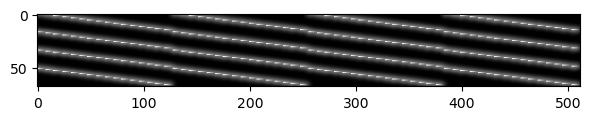

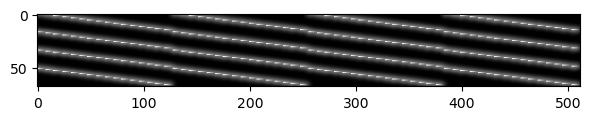

In [11]:
print(dict["EWS1"].shape)
visualise_lighting_sequence_object(dict["EWA1"])

visualise_lighting_sequence_object("EWA1", dict)

(512,)


In [9]:
#visualise audio sequence
import librosa.display

#covnerts mp3 to wav and loads it
def convert_mp3_to_wav(mp3path, wavpath=None):
    if wavpath == None:
        wavpath = mp3path.replace(".mp3", ".wav")
    subprocess.call(['ffmpeg', '-i', mp3path+".mp3" , wavpath+'.wav'])
    
    return librosa.load(wavpath)

#load wav
def load_wav(path, start=None, stop=None):
    ## TO DO: add start and stop regions

    y, sr = librosa.load(path)
    return y[start:stop], sr

#visualise waveform
def visualise_audio(audio, start=None, stop=None):
    ## TO DO: add start and stop regions

    try:
        y, sr, sr = librosa.load(audio)
    except:
        y, sr = audio
    y=y[start:stop]

    plt.figure(figsize=(7, 3))
    plt.title('waveform')
    librosa.display.waveshow(y, sr=sr)

def visualise_spectrogram(audio, start=None, stop=None):
    ## TO DO: add start and stop regions
    try:
        y, sr = librosa.load(audio)
    except:
        y, sr = audio
    y=y[start:stop]
    plt.figure(figsize=(7, 3))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()



In [ ]:
### Create class for audio and final show sequences

class Show_sequence:
    def __init__(self) -> None:
        self.show_dict = {}
        self.df = pd.DataFrame()
        self.show_sequence = []
        self.frameRate = 64
        pass

    def __call__(self):
        return self.show_sequence

    def __str__(self) -> str:
        try:
            return self.song_name
        except:
            return "No song loaded"

    def load_song(path, start=None, stop=None):
        if path.split(".")[-1] == "mp3":
            wav_path = path.replace(".mp3", ".wav")
            wav_path = convert_mp3_to_wav(path)
            path = wav_path
        #### CHECK IF THIS CODE WORKS #### -> pylance doesnt like it atm
        self.audio, self.sr = load_wav(path, start, stop)
        self.song_name = path.split("/")[-1].replace(".wav", "")
        self.length = (self.audio.shape[0])/self.sr
        self.bpm, self.beat_times = librosa.beat.beat_track(self.audio, sr=self.sr)
        self.beat_times = np.concatenate(([0], self.beat_times))
    ### TODO ### -> add in start and stop time conversions!!!

    def insert_show(self, show_image, show_library=None, start=None, stop=None, index=None):
        try:
            show_image = show_library[show_image]
        except:
            pass
        show_image = show_image[start:stop]

        if index == None:
            self.show_sequence = np.append(self.show_sequence, show_image, axis=0)
        else:
            self.show_sequence = np.insert(self.show_sequence, index, show_image, axis=0)

    def remove_show(self, index):
        self.show_sequence = np.delete(self.show_sequence, index, axis=0)

    def save_sequence(self, path):
        iio.imwrite(path, self.show_sequence)

    def visualise_spectrogram(self, start=None, stop=None):
        visualise_spectrogram(self.audio[start:stop])
    
    def visualise_waveform(self, start=None, stop=None):
        visualise_audio(self.audio[start:stop])

    def visualise_show_sequence(self, start=None, stop=None):
        visualise_lighting_sequence_object(self.show_sequence[start:stop])
        
    def save_sequence(self, path):
        ### TODO add in json file
        iio.imwrite(path, self.show_sequence)
        pass
    
    ### TODO ### -> complete show sequence to show both audio and lighting on the same axes
    def visualise_show_sequence(self, start=None, stop=None):
        pass

    ### TODO ### -> finish render video
    # Make lighting setup
    #  how do you call a class?
    def render_show(self, path, start=None, stop=None, Light_show_setup ,fps=30):
        if self.audio == None:
            raise Exception("No audio loaded")

        #calculate time
        length_in_seconds = self.audio.shape[0]/self.sr
        #fill in array to match length of audio
        blank_frames = seconds_to_frames(length_in_seconds, self.bpm)
        blank = np.zeros((blank_frames,self.audio.shape[1:]))
        
        #concatenate show with blank
        output_show = np.concatenate((self.show_sequence, blank), axis=0)
        output_light_frames = np.array([seconds_to_frames(time, self.bpm) for time in self.beat_times])

        #parse show
        try:
            weights = Light_show_setup.parse_show(self.show_sequence)
        except:
            raise Exception("Light show setup not loaded properly")
        
        #render frames
        rendered_frames = np.empty(output_show.shape[0])
        for idx,image in enumerate(output_show):
            rendered_frames[idx] = Light_show_setup.render_frame(image, weights[idx])

        #average frames betwen average_light_frames to account for frame rate
        averaged_frames = np.empty(output_light_frames.shape[0])

        for idx, frame in enumerate(output_light_frames):
            averaged_frames[idx] = np.mean(rendered_frames[frame:output_light_frames[idx+1]], axis=0)

        self.avereged_frames = averaged_frames
        return averaged_frames
        #make video

        ## try this with open cv

        #save video
        
        #add audio

        ## try this with ffmpeg

        #save video with audio




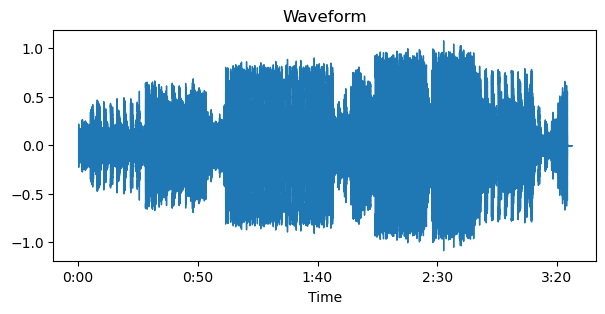

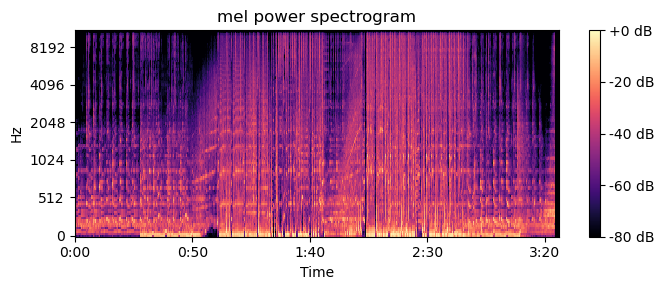

In [10]:
### Import and visualise song

song_path = "Supersonic(VIP).wav"


song = load_wav(song_path)

visualise_audio(song)

visualise_spectrogram(song)

In [100]:
# Concatenate show units

#create show sequence segments
def show_segment(show, start=None, end=None):
    # takes show image nnparray and returns segment of show
    show_segment = show[start:end]
    return show_segment

#concatenate show segments
def concatenate_show_units(show_list):
    # takes list of show image nparray and concatenates them to produce show sequence

    ### TODO account for frame rate of show
    show_sequence = np.concatenate(show_list, axis=1)
    return show_sequence





In [101]:
show_list = list(dict.keys())[0:3]

show_list = [dict[show] for show in show_list]


show_sequence = concatenate_show_units(show_list)
### Create show sequence class object

NameError: name 'show_sequence' is not defined

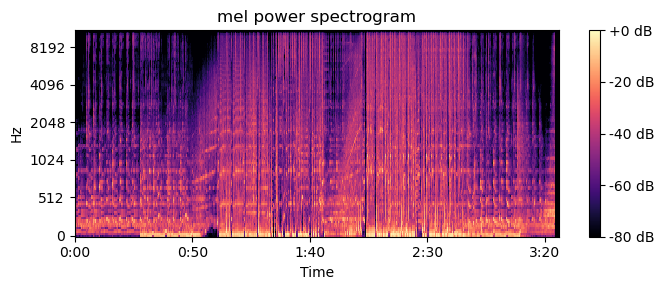

In [21]:
visualise_spectrogram(song)
visualise_lighting_sequence_object(show_sequence)

In [ ]:
### Create animated music video of sequence

###

def visualise_lights(images, positions, resoltuion):
    #takes list of images and positions and draws them on a canvas
    if len(images) != len(positions):
        raise ValueError("Number of images and positions must be equal lists")
    canvas = np.zeros(resoltuion)

    for idx, image in enumerate(images):
        canvas[positions[idx][0]:positions[idx][0]+image.shape[0], positions[idx][1]:positions[idx][1]+image.shape[1]] = image
   
    return canvas

def tune_lights(image, weights=None):
    #takes list of images and weights and returns weighted images
    if weights == None:
        weights = np.ones_like(image)
    if weights.shape != image.shape:
        raise ValueError("Image and weights must be same shape")

    image = image*weights

    return image


### class for lighting system
class Light_show_setup:
    def __init__(self, numLights):
        self.numLights = 16
        self.light_dict = {}
        self.df = pd.DataFrame(columns=["name", "path", "lightnumber"])
        self.light_setup = pd.DataFrame(columns=["lightnumber", "image", "position"])
        self.stage_size = (640, 480)
        pass

    def __call__(self):
        try:
            return self.df.head()
        except:
            return "No light setup loaded"
        
    def __str__(self) -> str:
        try:
            return self.light_setup["lightnumber"]
        except:
            return "No light setup loaded"
        

    def load_json(self, path):
        pd.concat(self.df,json_to_pandas(json_path, "lights"))
        self.dict = json_to_pandas(json_path, "lights")

    def save_library(self, json_path, output_folder="custom"):
        pandas_to_json(self.df, json_path, "lights")
        save_images_from_dict(self.light_dict, output_folder)

    def set_light(self, name, image, light_number):
        pd.concat(self.light_setup,{"name":name,"image": image, "light_number": light_number} )
        self.numLights = len(self.light_setup["light_number"])
        
    def set_light_number(self, name, light_number):
        self.light_dict[name] = self.light_dict[name][light_number]

    def set_positons(self, light_numbers=None, positions=None):
        if light_numbers == None:
            #defaults to 16
            light_numbers=range(self.numLights)

        self.light_setup["lightnumber"] = {"light_number": light_numbers, "position": positions}
    
    ### TODO do parse sequence
    def parse_show_sequence(self, show_sequence):
        #takes show sequence and weights
        try:
            return weights
        except:
            pass    


    def render_scene(self, weights=None):
        images = self.light_setup["image"]
        positions = self.light_setup["position"]
        
        image = tune_lights(images, weights)
        canvas = visualise_lights(image, positions, self.stage_size)

        return canvas


